# Tahap preprocessing

In [1]:
import pandas as pd
import numpy as np
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_tweet.csv', encoding='UTF-8')

In [3]:
df.head()

,txt,analysis
0,Antri dri jam 10 sekrang baru nomer 375 untuk ...,negatif
1,Mau laporan sama @KAI121 kalau sistem antrian ...,negatif
2,"Sudah 3.000 Unit Genose Diproduksi, Rektor UG...",positif
3,@dvxooo_ Selamat siang. Layanan GeNose C19 di ...,positif
4,@KAI121 min untuk tes genose di stasiun bekasi...,positif


# remove @user

In [4]:
#remove user
def remove_pattern(txt, pattern):
    r = re.findall(pattern, txt)
    for i in r:
        txt = re.sub(i, '', txt)
    return txt    
df['tweet'] = np.vectorize(remove_pattern)(df['txt'], "@[\w]*")
df.head()

,txt,analysis,tweet
0,Antri dri jam 10 sekrang baru nomer 375 untuk ...,negatif,Antri dri jam 10 sekrang baru nomer 375 untuk ...
1,Mau laporan sama @KAI121 kalau sistem antrian ...,negatif,Mau laporan sama kalau sistem antrian pemerik...
2,"Sudah 3.000 Unit Genose Diproduksi, Rektor UG...",positif,"Sudah 3.000 Unit Genose Diproduksi, Rektor UG..."
3,@dvxooo_ Selamat siang. Layanan GeNose C19 di ...,positif,Selamat siang. Layanan GeNose C19 di Stasiun ...
4,@KAI121 min untuk tes genose di stasiun bekasi...,positif,min untuk tes genose di stasiun bekasi hari i...


# cleaning text & case folding

In [5]:
def preprocess_text(tweet):
        #remove url
        tweet = re.sub(r"http\S+", "", tweet)
        
        #remove number
        tweet = re.sub(r"\d+", "", tweet)
        
        # Remove all the special characters
        tweet = re.sub(r'[^\w]', ' ', str(tweet))

        # remove all single characters
        tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)

        # Remove single characters from the start
        tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', tweet)

        # Substituting multiple spaces with single space
        tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)

        # Removing prefixed 'b'
        tweet = re.sub(r'^b\s+', '', tweet)

        # Converting to Lowercase
        tweet = tweet.lower()
        
        return tweet
df['tweet'] = df['tweet'].apply(preprocess_text)
df.drop(columns=['txt'], inplace=True)
df['tweet'].head()

0    antri dri jam sekrang baru nomer untuk tes gen...
1    mau laporan sama kalau sistem antrian pemeriks...
2    sudah unit genose diproduksi rektor ugm kami a...
3     selamat siang layanan genose di stasiun bekas...
4     min untuk tes genose di stasiun bekasi hari i...
Name: tweet, dtype: object

# stemming text

In [6]:
# import StemmerFactory class
# create stemmer
def stemming(tweet):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()# stemming process
    output   = stemmer.stem(tweet)
    return output
df['tweet'] = df['tweet'].apply(stemming)
df.head(25)

,analysis,tweet
0,negatif,antri dri jam sekrang baru nomer untuk tes gen...
1,negatif,mau lapor sama kalau sistem antri periksa geno...
2,positif,sudah unit genose produksi rektor ugm kami aka...
3,positif,selamat siang layan genose di stasiun bekas bu...
4,positif,min untuk tes genose di stasiun bekas hari ini...
5,positif,periode pra tiada mudik yaitu pada tanggal apr...
6,negatif,calon tumpang yang tunggu hasil tes genose di ...
7,positif,kaligung gaperlu rapid or genose kalo mas ga y...
8,positif,selamat siang sesuai adendum surat edar satu t...
9,positif,genose test wajib laku di bandara asal atau ba...


# stopword removal

In [7]:
stop_factory = StopWordRemoverFactory().get_stop_words()
f= open("idstopword.txt", "r")
y= f.read()
more_stopword = y.split()

# Merge stopword

def stop_rev(tweet):
    data = stop_factory + more_stopword
    dictionary = ArrayDictionary(data)
    stoprev = StopWordRemover(dictionary)
    stem_text = stoprev.remove(tweet)
    return stem_text
df['tweet'] = df['tweet'].apply(stop_rev)
df['tweet'].head()

0    antri dri jam sekrang nomer tes genose gimana ...
1    lapor kalau sistem antri periksa genose rapid ...
2         unit genose produksi rektor ugm akan inovasi
3    selamat siang layan genose stasiun bekas buka ...
4        min tes genose stasiun bekas ini tutup jam ya
Name: tweet, dtype: object

# tokenize

In [8]:
def tokenize(stop_rev):
    stop_rev = nltk.tokenize.word_tokenize(stop_rev)
    return stop_rev
df['tweet'] = df['tweet'].apply(tokenize)
df['tweet'].head()

0    [antri, dri, jam, sekrang, nomer, tes, genose,...
1    [lapor, kalau, sistem, antri, periksa, genose,...
2    [unit, genose, produksi, rektor, ugm, akan, in...
3    [selamat, siang, layan, genose, stasiun, bekas...
4    [min, tes, genose, stasiun, bekas, ini, tutup,...
Name: tweet, dtype: object

In [9]:
df.to_csv('data_clean.csv', index=False)
data_clean =pd.read_csv('data_clean.csv', encoding='UTF-8')
data_clean.head()

,analysis,tweet
0,negatif,"['antri', 'dri', 'jam', 'sekrang', 'nomer', 't..."
1,negatif,"['lapor', 'kalau', 'sistem', 'antri', 'periksa..."
2,positif,"['unit', 'genose', 'produksi', 'rektor', 'ugm'..."
3,positif,"['selamat', 'siang', 'layan', 'genose', 'stasi..."
4,positif,"['min', 'tes', 'genose', 'stasiun', 'bekas', '..."


In [10]:
data_clean = data_clean.astype({'analysis':'category'})
data_clean = data_clean.astype({'tweet':'string'})
data_clean.dtypes

analysis    category
tweet         string
dtype: object

  (0, 658)	0.2739560342905819
  (0, 1380)	0.0995004492952551
  (0, 805)	0.20802583308644862
  (0, 1596)	0.17258900539321662
  (0, 364)	0.2739560342905819
  (0, 285)	0.16366972276112926
  (0, 290)	0.2870645338978489
  (0, 1037)	0.23700524924444596
  (0, 387)	0.2739560342905819
  (0, 784)	0.11394921977650756
  (0, 999)	0.30553992642091693
  (0, 455)	0.22024952965867647
  (0, 445)	0.045793944663349635
  (0, 1463)	0.20100387700091857
  (0, 1005)	0.30553992642091693
  (0, 1289)	0.30553992642091693
  (0, 575)	0.1189773310235273
  (0, 372)	0.30553992642091693
  (0, 80)	0.18694596459104296
  (1, 1552)	0.23577678879655806
  (1, 849)	0.2819752690546931
  (1, 835)	0.26492478456119906
  (1, 381)	0.24344371454375632
  (1, 1154)	0.2819752690546931
  (1, 264)	0.2819752690546931
  :	:
  (597, 784)	0.24695023874868602
  (597, 445)	0.09924443177442274
  (598, 781)	0.6110721545197744
  (598, 1032)	0.4479808445210218
  (598, 132)	0.4244778580554352
  (598, 929)	0.4827393254767246
  (598, 445)	0.1126289331

Text(0.5, 1.0, 'Kata - kata yang sering muncul - Top 10')

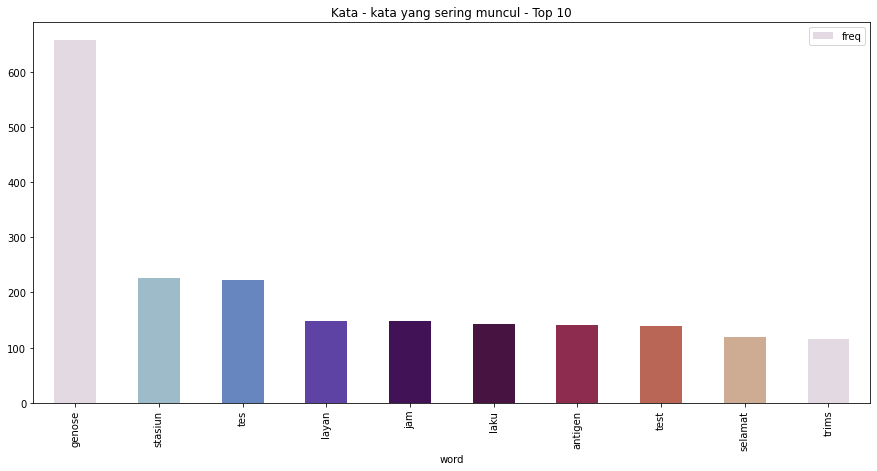

In [10]:
#proses tf-idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tvec = TfidfVectorizer()
X_tVec = tvec.fit_transform(data_clean['tweet'])
print(X_tVec)
cvec = CountVectorizer()
X_cVec = cvec.fit_transform(data_clean['tweet'])
sum_words = X_cVec.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 10))
frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Kata - kata yang sering muncul - Top 10")

Text(0.5, 1.0, 'WordCloud ')

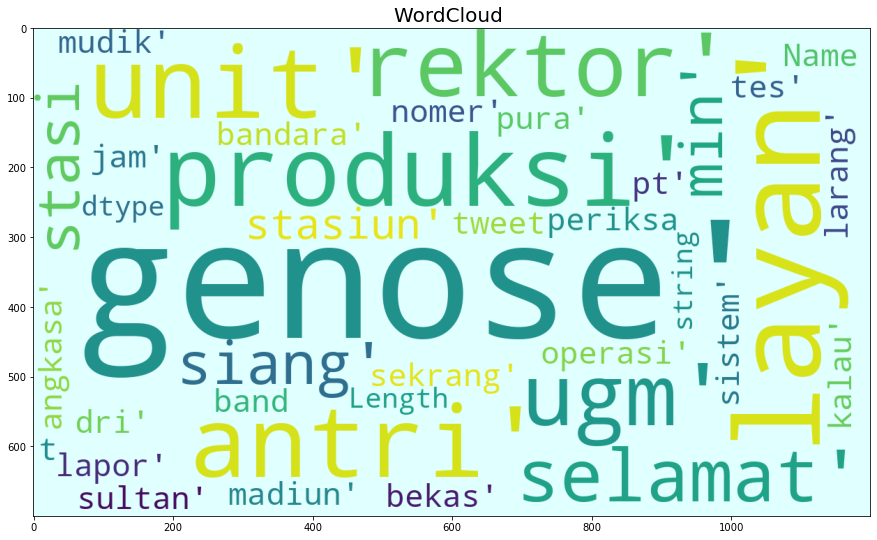

In [12]:
word = WordCloud(background_color = 'lightcyan', width = 1200,height = 700).generate(str(data_clean['tweet']))
plt.figure(figsize = (15, 20))
plt.imshow(word)
plt.title("WordCloud ", fontsize = 20)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cVec, data_clean['analysis'], test_size=0.3, random_state=6)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, metric='euclidean') 
classifier.fit(X_train, y_train)
print(classifier.kneighbors(n_neighbors=2, return_distance=True))

(array([[4.79583152, 4.79583152],
       [5.        , 5.09901951],
       [3.16227766, 3.31662479],
       [3.31662479, 3.31662479],
       [4.12310563, 4.24264069],
       [5.09901951, 5.19615242],
       [2.        , 4.79583152],
       [2.64575131, 2.64575131],
       [2.23606798, 3.        ],
       [3.        , 3.16227766],
       [4.35889894, 4.69041576],
       [3.74165739, 3.87298335],
       [2.82842712, 3.        ],
       [2.64575131, 3.        ],
       [2.64575131, 2.82842712],
       [2.23606798, 2.64575131],
       [4.24264069, 4.35889894],
       [2.44948974, 2.44948974],
       [2.23606798, 2.23606798],
       [3.46410162, 3.60555128],
       [3.        , 3.31662479],
       [1.41421356, 2.23606798],
       [0.        , 2.44948974],
       [4.24264069, 4.47213595],
       [3.46410162, 3.60555128],
       [4.47213595, 4.47213595],
       [3.31662479, 3.31662479],
       [2.23606798, 2.64575131],
       [3.        , 3.16227766],
       [4.24264069, 4.35889894],
       [1

In [14]:
y_pred = classifier.predict(X_test)

[[  8  16]
 [ 17 139]]
              precision    recall  f1-score   support

     negatif       0.32      0.33      0.33        24
     positif       0.90      0.89      0.89       156

    accuracy                           0.82       180
   macro avg       0.61      0.61      0.61       180
weighted avg       0.82      0.82      0.82       180



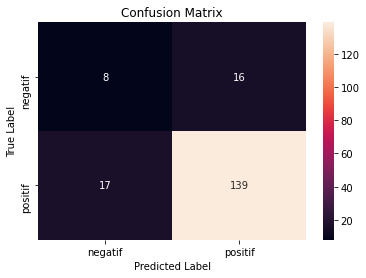

In [15]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rata-rata')

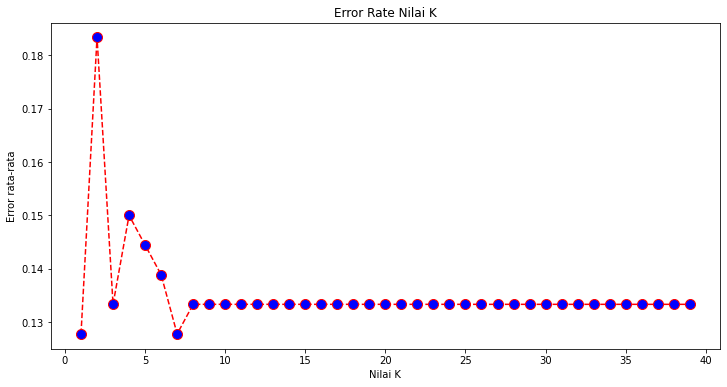

In [17]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')